# Working with MNIST dataset

In [2]:
# necessry imports
%matplotlib  inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

#import helper

import matplotlib.pyplot as plt

# Downloading and loading the MNIST dataset

In [4]:
from torchvision import datasets, transforms

In [5]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Processing...
Done!


~~~~
for image, label in iter(trainloader):
    ...
~~~~

In [8]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images), images.shape, labels.shape)

<class 'torch.Tensor'> torch.Size([64, 1, 28, 28]) torch.Size([64])


There are 64 images, 1 color channel (grey scale), and each image is of dimension 28 X 28.

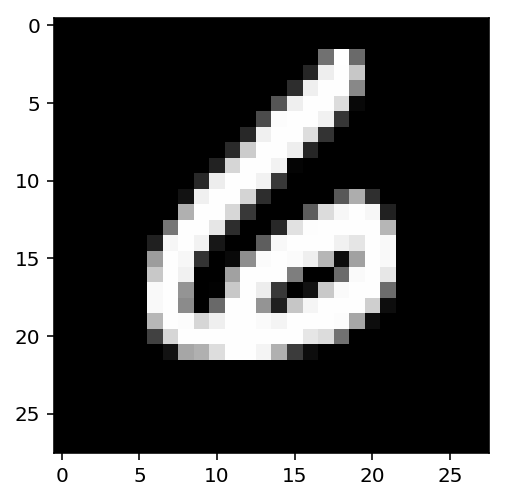

In [10]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

Our network should be of 784 input units (28x28 pixels), 256 hidden units, 10 (one for each of the number classes) output units.

In [56]:
X = images.reshape(images.shape[0],-1)

# size of each layer of network
n_input = X.shape[1]
n_hidden = 256
n_output = 10

# checking 
n_input, n_hidden, n_output

(784, 256, 10)

In [57]:
def activation(x):
    """ Sigmoid activation function
    
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

In [58]:
def NN_basic(X, n_input, n_hidden, n_output):
    # weights and biases
    W1 = torch.randn(n_input, n_hidden)
    W2 = torch.randn(n_hidden, n_output)
    
    # bais terms
    B1 = torch.randn(n_hidden)
    B2 = torch.randn(n_output)
    
    # NN
    h = activation(torch.mm(X, W1) + B1)
    y = activation(torch.mm(h, W2) + B2)
    
    return y

In [59]:
output = NN_basic(X, n_input, n_hidden, n_output)
output[0]

tensor([4.4060e-09, 9.5335e-01, 1.0000e+00, 1.0000e+00, 1.0000e+00, 9.8693e-01,
        6.5158e-02, 6.2525e-03, 5.9981e-07, 7.8970e-03])

### Implementing Softmax for normalizing each of these probabilities

In [61]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

In [63]:
probabilities = softmax(output)
print(probabilities.shape, probabilities.sum(dim=1))

torch.Size([64, 10]) tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [64]:
probabilities[0]

tensor([0.0540, 0.1401, 0.1468, 0.1468, 0.1468, 0.1449, 0.0577, 0.0544, 0.0540,
        0.0544])